In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread('edge_image.png')

Text(0.5, 1.0, 'Original Image')

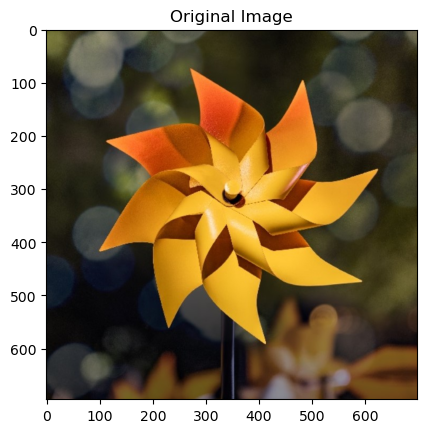

In [3]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

Text(0.5, 1.0, 'Grayscale Image')

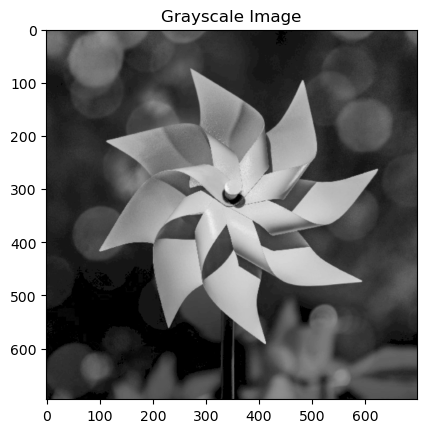

In [4]:
gry_img = cv2.imread('edge_image.png',cv2.IMREAD_GRAYSCALE)
plt.imshow(gry_img, cmap = 'gray')
plt.title('Grayscale Image')

# Robert Edge Detection

In [5]:
kernel_gx = np.array([[1, 0], [0, -1]])
kernel_gy = np.array([[0, 1], [-1, 0]])

In [6]:
gradiant_x = cv2.filter2D(gry_img, cv2.CV_32F, kernel_gx)
gradiant_y = cv2.filter2D(gry_img, cv2.CV_32F, kernel_gy)

NDimage Method

With Formula Method

In [7]:
gradiant_magnitude = np.sqrt(gradiant_x**2 + gradiant_y**2)

In [8]:
gradiant_magnitude.min()

0.0

In [9]:
gradiant_magnitude.max()

185.60712

Without Formula Method

In [10]:
magnitude = cv2.magnitude(gradiant_x, gradiant_y)
print(magnitude.min())
print(magnitude.max())

0.0
185.60712


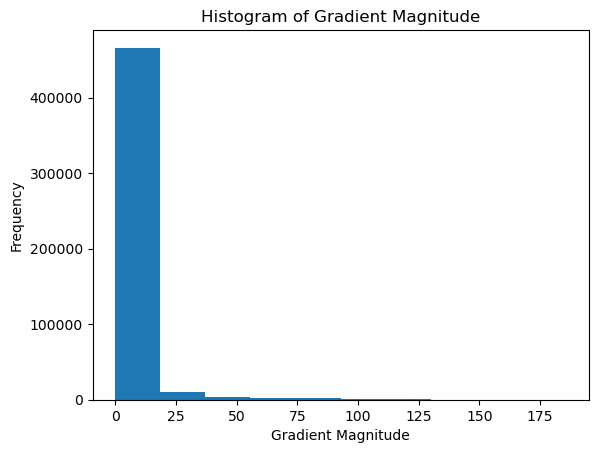

In [11]:
plt.hist(gradiant_magnitude.ravel())
plt.title('Histogram of Gradient Magnitude')
plt.xlabel('Gradient Magnitude')
plt.ylabel('Frequency')
plt.show()

In [12]:
threshold = 15
edges = (gradiant_magnitude > threshold)

Text(0.5, 1.0, 'Robert Edged Image')

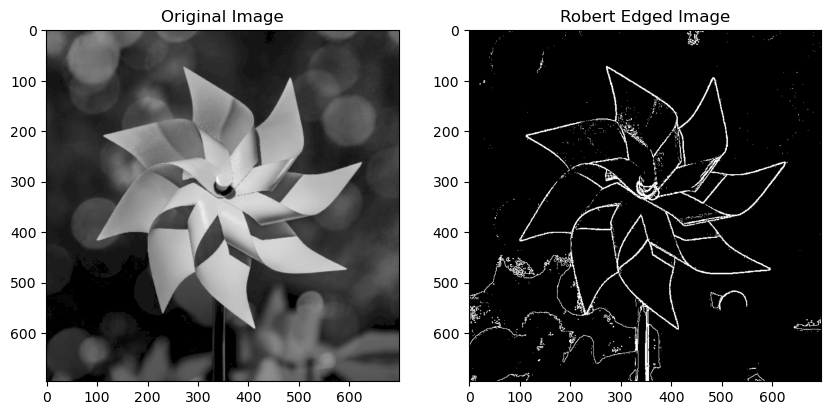

In [13]:
plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(gry_img, cmap = 'gray')
plt.title('Original Image')
plt.subplot(122)
plt.imshow(edges, cmap = 'gray')
plt.title('Robert Edged Image')

# Prewitt Edge Detection

In [14]:
prewitt_kernel_x = np.array([[-1, 0, 1] , [-1, 0, 1],[-1, 0, 1]])
prewitt_kernel_y = np.array([[-1, -1, -1],[0, 0, 0],[1, 1, 1]])

In [15]:
gradiant_x_prewitt = cv2.filter2D(gry_img, cv2.CV_32F, prewitt_kernel_x)
gradiant_y_prewitt = cv2.filter2D(gry_img, cv2.CV_32F, prewitt_kernel_y)

In [16]:
gradiant_magnitude_prewitt = np.sqrt(gradiant_x_prewitt**2 + gradiant_y_prewitt**2)
print(gradiant_magnitude_prewitt.min())
print(gradiant_magnitude_prewitt.max())

0.0
485.14844


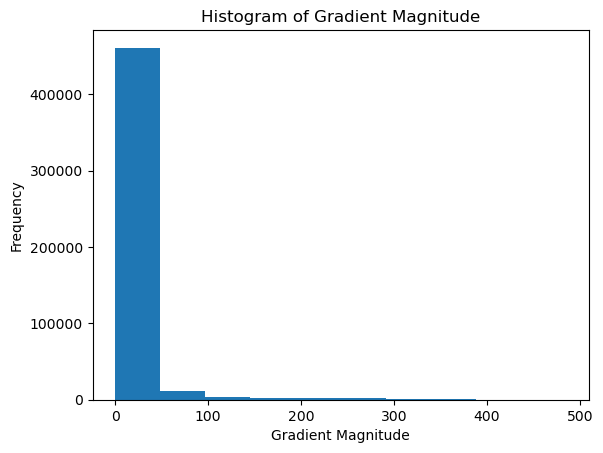

In [17]:
plt.hist(gradiant_magnitude_prewitt.ravel())
plt.title('Histogram of Gradient Magnitude')
plt.xlabel('Gradient Magnitude')
plt.ylabel('Frequency')
plt.show()

In [18]:
threshold_prewitt = 30
edges_prewitt = (gradiant_magnitude_prewitt > threshold_prewitt)

Text(0.5, 1.0, 'Prewitt Edged Image')

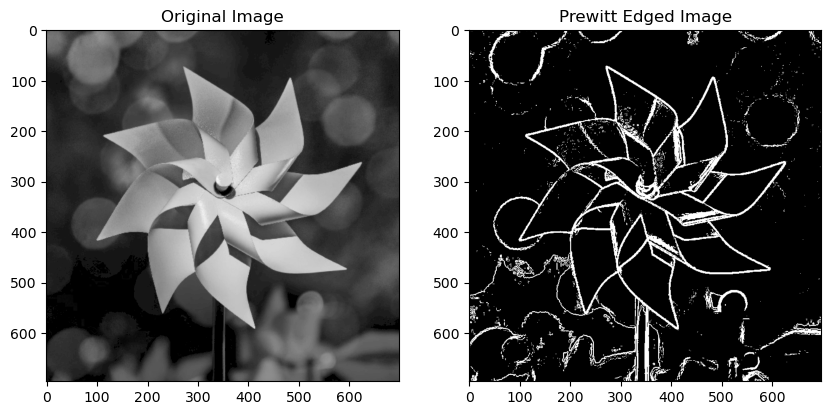

In [19]:
plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(gry_img, cmap = 'gray')
plt.title('Original Image')
plt.subplot(122)
plt.imshow(edges_prewitt, cmap = 'gray')
plt.title('Prewitt Edged Image')

# Sobel Edge Detection

In [20]:
edges_sobel_x = cv2.Sobel(gry_img, cv2.CV_32F, 1, 0)
edges_sobel_y = cv2.Sobel(gry_img, cv2.CV_32F, 0, 1)

In [21]:
magnitude_sobel = cv2.magnitude(edges_sobel_x, edges_sobel_y)

In [22]:
edges_sobel = edges_sobel_x + edges_sobel_y

Text(0.5, 1.0, 'Magnitude of Sobel Image')

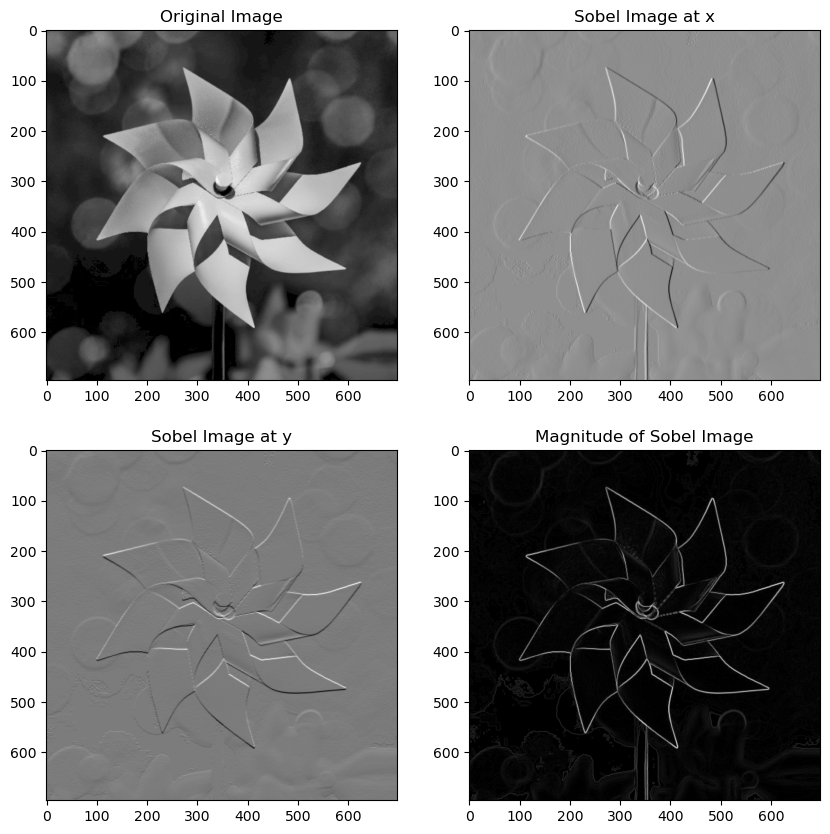

In [23]:
plt.figure(figsize=(10, 10))
plt.subplot(221)
plt.imshow(gry_img, cmap='gray')
plt.title('Original Image')
plt.subplot(222)
plt.imshow(edges_sobel_x, cmap='gray')
plt.title('Sobel Image at x')
plt.subplot(223)
plt.imshow(edges_sobel_y, cmap='gray')
plt.title('Sobel Image at y')
plt.subplot(224)
plt.imshow(magnitude_sobel, cmap='gray')
plt.title('Magnitude of Sobel Image')

# Scharr Edge Detection

In [24]:
gradient_x2 = cv2.Scharr(gry_img, cv2.CV_32F, 1, 0)
gradient_y2 = cv2.Scharr(gry_img, cv2.CV_32F, 0, 1)

In [25]:
edges_scharr = gradient_x2 + gradient_y2

In [26]:
gradient_magnitude = cv2.magnitude(gradient_x2, gradient_y2)

Text(0.5, 1.0, 'Magnitude of Scharr Image')

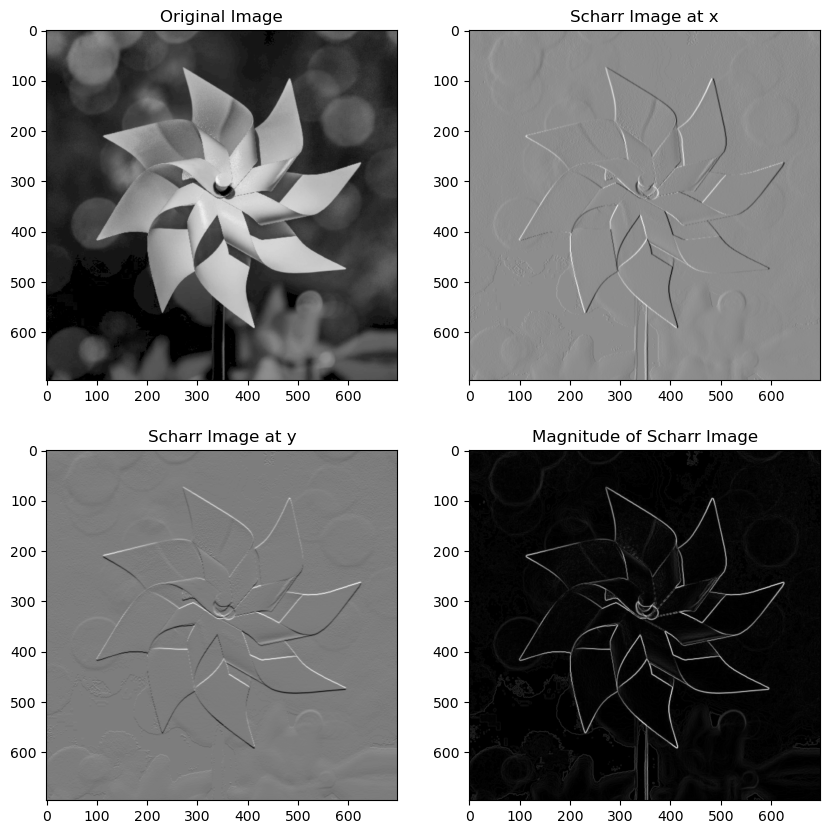

In [27]:
plt.figure(figsize=(10, 10))
plt.subplot(221)
plt.imshow(gry_img, cmap='gray')
plt.title('Original Image')
plt.subplot(222)
plt.imshow(gradient_x2, cmap='gray')
plt.title('Scharr Image at x')
plt.subplot(223)
plt.title('Scharr Image at y')
plt.imshow(gradient_y2, cmap='gray')
plt.subplot(224)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Magnitude of Scharr Image')

# Canny Edge Detection

In [28]:
edges_canny = cv2.Canny(gry_img, 80, 200)

Text(0.5, 1.0, 'Canny Edged Image')

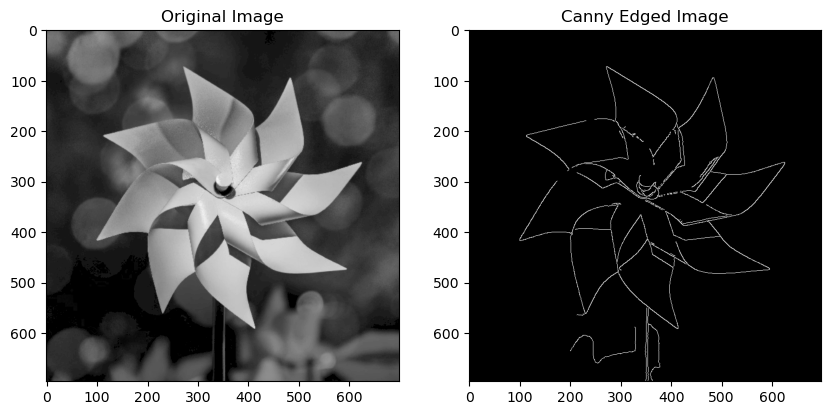

In [29]:
plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(gry_img, cmap = 'gray')
plt.title('Original Image')
plt.subplot(122)
plt.imshow(edges_canny, cmap = 'gray')
plt.title('Canny Edged Image')

# Laplacian Edge Detection

In [30]:
kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]], dtype=np.float32)

kernel_diagonal = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]],
                           dtype=np.float32)

In [31]:
laplacian = cv2.Laplacian(gry_img, ddepth=cv2.CV_32F)

In [32]:
laplacian = np.uint8(np.absolute(laplacian))

Text(0.5, 1.0, 'Laplacian Edged Image')

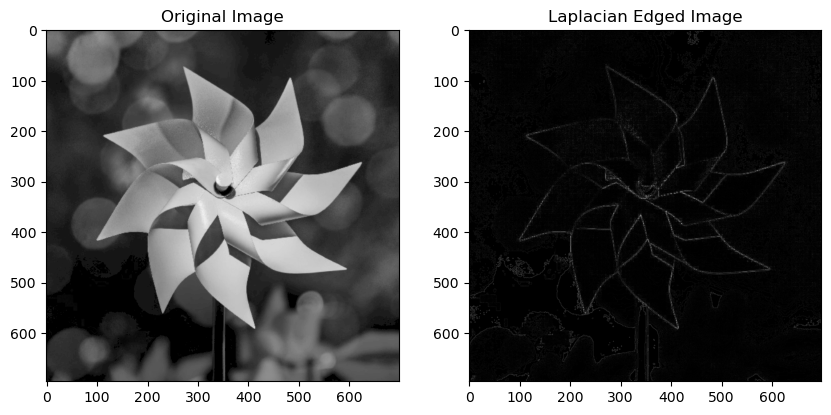

In [33]:
plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(gry_img, cmap = 'gray')
plt.title('Original Image')
plt.subplot(122)
plt.imshow(laplacian, cmap = 'gray')
plt.title('Laplacian Edged Image')

## Using First Kernel

In [35]:
laplacian_1 = cv2.filter2D(gry_img, ddepth=cv2.CV_32F, kernel=kernel)

In [36]:
laplacian_1 = np.uint8(np.absolute(laplacian_1))

Text(0.5, 1.0, 'Laplacian Edged Image')

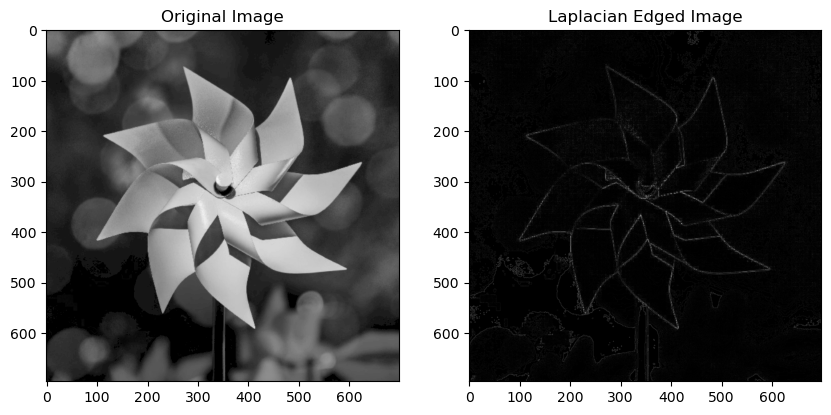

In [37]:
plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(gry_img, cmap = 'gray')
plt.title('Original Image')
plt.subplot(122)
plt.imshow(laplacian_1, cmap = 'gray')
plt.title('Laplacian Edged Image')

## Using Second Kernel

In [38]:
laplacian_2 = cv2.filter2D(gry_img, ddepth=cv2.CV_32F, kernel=kernel_diagonal)

In [40]:
laplacian_2 = np.uint8(np.absolute(laplacian_2))

Text(0.5, 1.0, 'Laplacian Edged Image')

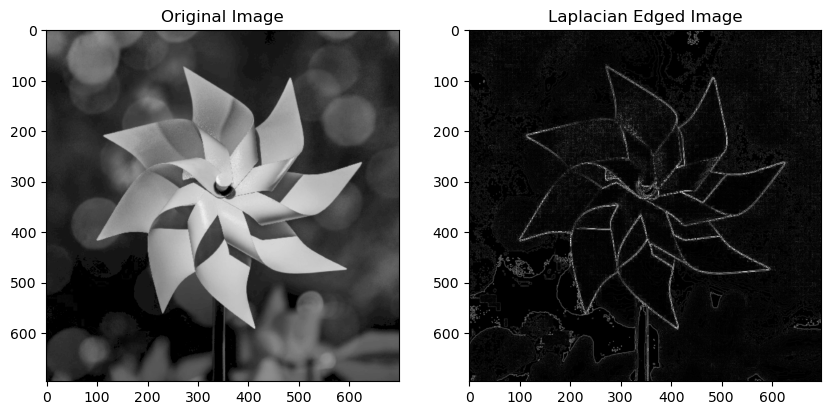

In [41]:
plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(gry_img, cmap = 'gray')
plt.title('Original Image')
plt.subplot(122)
plt.imshow(laplacian_2, cmap = 'gray')
plt.title('Laplacian Edged Image')